In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
from pickle import load

## First, lets load Cpx data

In [2]:
with open(r'../Combo_Cpx.pkl', 'rb') as f:
            All_Cpx=load(f)
Sisters_Cpx=All_Cpx.loc[(All_Cpx['Volcano']=="North Sister")| (All_Cpx['Volcano']=="South Sister")]
Sisters_Cpx['Sample_ID_Cpx']="Sisters"

C:\Users\penny\AppData\Local\Temp\ipykernel_32684\259473622.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sisters_Cpx['Sample_ID_Cpx']="Sisters"


In [3]:
sum(Sisters_Cpx['Volcano']=="North Sister")

6

In [4]:
sum(Sisters_Cpx['Volcano']=="South Sister")

11

## Splitting into Jorgenson and Wang

In [5]:
WangCopy=Sisters_Cpx.copy()
WangCopy['Preferred_P']=WangCopy['P_Wang21_eq1']
#WangCopy.loc[(Sisters_Cpx['Volcano']=="South Sister"), 'Preferred_P']=np.nan

WangCopy['Model']="Wang"
JorgensonCopy=Sisters_Cpx.copy()
JorgensonCopy['Preferred_P']=JorgensonCopy['P_Jorgenson22']
JorgensonCopy['Model']="Jorgenson"

Combo_Cpx=pd.concat([WangCopy, JorgensonCopy], axis=0)

## Choose Crustal density

In [6]:
rho=2700
P_axis_min=-3
P_axis_max=12
D_axis_min=100000*P_axis_min/(9.8*rho)
D_axis_max=100000*P_axis_max/(9.8*rho)


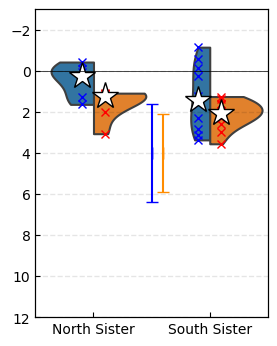

In [17]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(3,4), sharey=True)
ax2 = ax1.twinx()

volc_order=["North Sister", "South Sister"]
sns.violinplot(x="Volcano", y="Preferred_P",  cut=0,  inner=None, hue="Model",
            data=Combo_Cpx, split=True, ax=ax1, width=0.9, order=volc_order, stick=True)

ax1.plot(-0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Volcano"]=="North Sister")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Volcano"]=="North Sister")],  
         'xb')

ax1.plot(0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Volcano"]=="North Sister")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Volcano"]=="North Sister")],  
         'xr')

ax1.plot(-0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Volcano"]=="North Sister")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Volcano"]=="North Sister")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.9+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Volcano"]=="South Sister")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Volcano"]=="South Sister")],  
         'xb')

ax1.plot(1.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Volcano"]=="South Sister")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Volcano"]=="South Sister")],  
         'xr')

ax1.plot(0.9,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Volcano"]=="South Sister")]),  
         '*k', mfc='w', ms=20)

ax1.plot(1.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Volcano"]=="South Sister")]),  
         '*k', mfc='w', ms=20)

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 1.5])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax2.set_yticks([])
ax1.errorbar(0.5, 4, xerr=0, yerr=2.4,  ecolor='blue', elinewidth=1.5, fmt='none', capsize=4, mec='k')
ax1.errorbar(0.6, 4, xerr=0, yerr=1.9,  ecolor='darkorange', elinewidth=1.5, fmt='none', capsize=4, mec='k')

fig.savefig('Sisters_Cpx.png', dpi=200)

In [8]:
## Load in LP data

In [9]:
LPs=pd.read_excel(r'../Geophysics_April23.xlsx',
                  sheet_name="LPEarthquakes")
LPs_Sisters=LPs.loc[LPs['Volcano']=="Three sisters"]
LPs_Sisters

,Volcano,Latitude,Depth,Depth definition,Reference,Unnamed: 5,Unnamed: 6
21,Three sisters,44.103449,12.0,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN


## Raw template for geophysics and Exp Pet

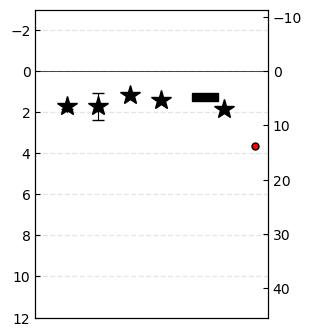

In [10]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(3,4), sharey=True)
ax2 = ax1.twinx()
from matplotlib import patches
elev=1.7 # Have choosen average elevation of ground around sisters, as source offset. 

# Wicks, 2002 - 6.5 +0.4
ax2.errorbar(0, 6.5, xerr=0, yerr=0.4,  
             fmt='*', ecolor='k', elinewidth=0.8, mfc='k', 
             ms=15, mec='k', capsize=4)

# dzurisin 2006 - 6.5 +2.5 km depth - Best fit sill
ax2.errorbar(0.5, 6.5, xerr=0, yerr=2.5, capsize=4,   fmt='*', ecolor='k', elinewidth=0.8, mfc='k', ms=15, mec='k')

#Dzurisin 2009 - 4.4 km if network translation ignored
ax2.plot(1, 4.4, '*k', mfc='k', ms=15)
ax2.plot(1.5, 5.4, '*k', mfc='k', ms=15)

# Riddick and Schmidt, 4-5.5 km bgl for mogi
rect_RS = patches.Rectangle((2,4),0.4,1.5,linewidth=1,
                            edgecolor='black',facecolor='black')
ax2.add_patch(rect_RS)

# 7 km depth for Sill
ax2.plot(2.5, 7, '*k', mfc='k', ms=15)

ax2.plot(3, LPs_Sisters['Depth']+elev, 'ok', mfc='red', ms=5)


ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.set_xlim([-0.5, 3.2])
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticks([ ])

#ax1.set_xticklabels(['Exp Pet', 'Exp Pet', 'MT', 'Seismics'], rotation=90)
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
                 
fig.savefig('Geophysical+Other_Sisters.png', dpi=200, bbox_inches="tight")

In [11]:
## Same for amphibole

Sisters_read_Amp=pt.import_excel('Sisters.xlsx', sheet_name='Amp_All')
Sisters_Input_Amp=Sisters_read_Amp['my_input']
Sisters_Amp=Sisters_read_Amp['Amps']
Sisters_Amp['Sample_ID_Amp']='Holocene'
Sisters_Amp_copy=Sisters_Amp.copy()
Sisters_Amp_comps=pt.get_amp_sites_from_input(amp_comps=Sisters_Amp)
# Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
Sisters_Amp_filt1=Sisters_Amp.loc[(Sisters_Amp_comps['cation_sum_All'].between(15, 16))]

Sisters_Amp_class=pt.classify_phases(df=Sisters_Amp_filt1, return_end_members=True,
                        str_to_drop='_Amp')
print(Sisters_Amp_class['Phase_Min_Group_ML'].unique())
Sisters_Amp_filt=Sisters_Amp_filt1.loc[Sisters_Amp_class['Phase_Min_Group_ML']=="Amp"].reset_index(drop=True)
Sisters_Amp_Press_NoFilter=pt.calculate_amp_only_press(amp_comps=Sisters_Amp_filt, 
                        Ridolfi_Filter=False, equationP="P_Ridolfi2021")
Sisters_Amp_Press_Filter=pt.calculate_amp_only_press(amp_comps=Sisters_Amp_filt, 
                        Ridolfi_Filter=True, equationP="P_Ridolfi2021")

Input_filt=Sisters_Input_Amp.loc[(Sisters_Amp_comps['cation_sum_All'].between(15, 16))
                                & (Sisters_Amp_class['Phase_Min_Group_ML']=="Amp")].reset_index(drop=True)
                                

FileNotFoundError: [Errno 2] No such file or directory: 'Sisters.xlsx'

In [ ]:
Sisters_Input_Amp
Amp_Mgno=

In [ ]:
len(Sisters_Amp_Press_NoFilter)

In [ ]:
plt.plot(
         (Sisters_Amp_filt['MgO_Amp']/40.3044)/(Sisters_Amp_filt['MgO_Amp']/40.3044+Sisters_Amp_filt['FeOt_Amp']/71.844),
    Sisters_Amp_Press_NoFilter['P_kbar_calc'], 'ok')

In [ ]:
Sisters_Amp_Press_NoFilter[Sisters_Amp_Press_NoFilter['P_kbar_calc']>5.5

In [ ]:
Kaw_P=pt.calculate_amp_only_press(amp_comps=Sisters_Amp_filt, equationP="P_Kraw2012"
                                 ,deltaNNO=0)
plt.plot(Kaw_P['Mg#_Amp'], Kaw_P['PH2O_kbar_calc'], 'ok')

In [ ]:
plt.plot(Sisters_Amp_Press_NoFilter['P_kbar_calc'].loc[Kaw_P['Mg#_Amp']>75],
         Kaw_P['PH2O_kbar_calc'].loc[Kaw_P['Mg#_Amp']>75], 'ok')

In [ ]:
Input_filt.loc[(Kaw_P['Mg#_Amp']<65)& (Sisters_Amp_Press_NoFilter['P_kbar_calc']<5.5)]

In [ ]:
Input_filt.loc[(Kaw_P['Mg#_Amp']>75)& (Sisters_Amp_Press_NoFilter['P_kbar_calc']>5.5)]

In [ ]:
Kaw_P

In [ ]:
Amp_Chem=pt.calculate_amp_only_melt_comps(amp_comps=Sisters_Amp_filt)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.plot(
         Amp_Chem['MgO_Eq9_Zhang17'],
    Sisters_Amp_Press_NoFilter['P_kbar_calc'], 'ok')
ax1.set_xlabel('Calculated MgO Zhang')
ax1.set_ylabel('Calcated P Ridolfi 21')

ax2.set_xlabel('Calculated SiO2 Zhang')
ax2.set_ylabel('Calcated P Ridolfi 21')

ax2.plot(
         Amp_Chem['SiO2_Eq1_Zhang17'],
    Sisters_Amp_Press_NoFilter['P_kbar_calc'], 'ok')

In [ ]:
#None Filtered
Sisters_Amp_Press_All=Sisters_Amp_Press_NoFilter.copy()
Sisters_Amp_Press_All['Preferred_P']=Sisters_Amp_Press_All['P_kbar_calc']
Sisters_Amp_Press_All['Model']="Ridolfi not filtered"
Sisters_Amp_Press_All['Sample_ID_Amp']="Sisters domefield"

Sisters_Amp_Press_Filt=Sisters_Amp_Press_Filter.copy()
Sisters_Amp_Press_Filt['Preferred_P']=Sisters_Amp_Press_Filt['P_kbar_calc']
Sisters_Amp_Press_Filt['Model']="Ridolfi filtered"
Sisters_Amp_Press_Filt['Sample_ID_Amp']="Sisters domefield"

Combo_Amp=pd.concat([Sisters_Amp_Press_All, Sisters_Amp_Press_Filt], axis=0)

In [ ]:
Combo_Amp.to_pickle("Amp_Sisters.pkl")

In [ ]:
len(Sisters_Amp_Press_All)

245

In [ ]:
Sisters_Amp_Press_All['Sample_ID_Amp']

0      Crater domefield
1      Crater domefield
2      Crater domefield
3      Crater domefield
4      Crater domefield
             ...       
240    Crater domefield
241    Crater domefield
242    Crater domefield
243    Crater domefield
244    Crater domefield
Name: Sample_ID_Amp, Length: 245, dtype: object

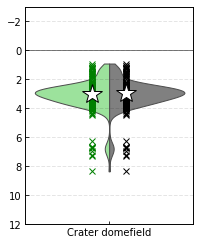

In [ ]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(5*0.6,4), sharey=True)
ax2 = ax1.twinx()

volc_order=["Sisters", "Sisters domefield"]
sns.violinplot(x="Sample_ID_Amp", y="Preferred_P",  cut=0, 
               linewidth=1,hue="Model", inner=None,
            data=Combo_Amp, split=True, ax=ax1, width=0.9, order=volc_order, stick=True
              , palette=['lightgreen', 'grey'])

# ax1.plot(-0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Volcano"]=="North Sister")],
#       Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Volcano"]=="North Sister")],  
#          'xb')

# ax1.plot(0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Volcano"]=="North Sister")],
#       Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Volcano"]=="North Sister")],  
#          'xr')

# ax1.plot(-0.1,
#       np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Volcano"]=="North Sister")]),  
#          '*k', mfc='w', ms=20)

# ax1.plot(0.1,
#       np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Volcano"]=="North Sister")]),  
#          '*k', mfc='w', ms=20)

ax1.plot(0.9+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="South Sister")],
      Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="South Sister")],  
         'x', mec='green')

ax1.plot(1.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="South Sister")],
      Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="South Sister")],  
         'x', mec='k')

ax1.plot(0.9,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="South Sister")]),  
         '*k', mfc='w', ms=20)

ax1.plot(1.1,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="South Sister")]),  
         '*k', mfc='w', ms=20)

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([0.5, 1.5])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
# ax1.set_yticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)


fig.savefig('Sisters_Amp.png', dpi=200)



In [ ]:
Sisters_Amp_Press_Filter

,P_kbar_calc,Input_Check,Fail Msg,classification,equation,H2O_calc,Fe2O3_calc,FeO_calc,Total_recalc,Sum_input,...,FeOt_Amp,MnO_Amp,MgO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,Cr2O3_Amp,F_Amp,Cl_Amp,Sample_ID_Amp
0,2.900868,True,,Mg-hastingsite,1b,1.793710,6.749393,6.809810,99.567063,97.222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,False,APE >60,Mg-Hornblende,1b,1.753117,5.839672,6.877389,100.417060,98.281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.327280,True,,Mg-Hornblende,1b,1.853930,8.814875,4.703263,100.169790,97.539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.082220,True,,Mg-Hornblende,1b,1.818471,8.855900,4.058348,99.182058,96.610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.019863,True,,Mg-Hornblende,1b,1.846387,6.915142,5.870667,100.207881,97.786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.4128,0.3021,12.2825,10.5433,2.7719,0.4604,0.0054,0.0,0.0,Lassen domefield
538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4141,0.6550,13.2942,18.2989,0.3220,0.0459,0.0330,0.0,0.0,Lassen domefield
539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0572,0.6882,12.9776,18.4196,0.6676,0.1259,0.1680,0.0,0.0,Lassen domefield
540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0174,0.4440,13.7267,12.0664,1.3288,0.3254,0.0407,0.0,0.0,Lassen domefield


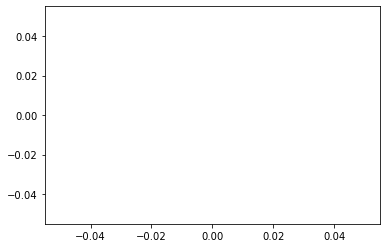

In [ ]:
plt.plot(1.1,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="South Sister")]),  
         '*k', mfc='w', ms=20)

In [ ]:
Combo_Amp["Sample_ID_Amp"]

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
             ...       
537    Lassen domefield
538    Lassen domefield
539    Lassen domefield
540    Lassen domefield
541    Lassen domefield
Name: Sample_ID_Amp, Length: 2168, dtype: object

In [ ]:
Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="South Sister")]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
537   NaN
538   NaN
539   NaN
540   NaN
541   NaN
Name: Preferred_P, Length: 542, dtype: float64